In [18]:
import pandas as pd
# from sklearn.preprocessing import label_binarize
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import sklearn.svm as svm
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
# %matplotlib widget
%matplotlib inline

In [20]:
iris = pd.read_excel("Iris.xlsx", header=1)
data = iris.iloc[:, 0:4]
target = iris.iloc[:, 4:5]
# target = label_binarize(target, classes=["Setosa", "Versicolour", "Virginica"])
target_encoder = LabelEncoder().fit(target)
target = target_encoder.transform(target)
X_train, X_test, Y_train, Y_test = train_test_split(data,
                                                    target,
                                                    test_size=0.5,
                                                    random_state=0)


C:\Framework\Anaconda3\envs\ML\lib\site-packages\sklearn\preprocessing\_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Framework\Anaconda3\envs\ML\lib\site-packages\sklearn\preprocessing\_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


C:\Framework\Anaconda3\envs\ML\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Framework\Anaconda3\envs\ML\lib\site-packages\seaborn\axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


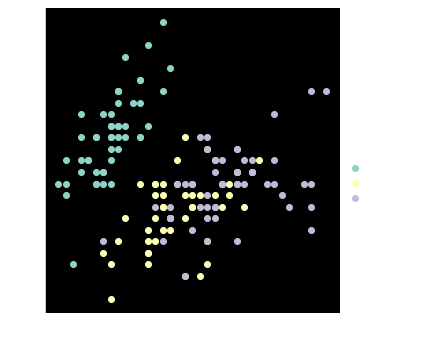

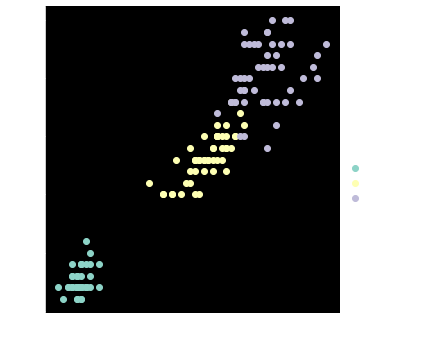

In [21]:
iris_raw = pd.read_excel('Iris.xlsx')
sns.FacetGrid(iris_raw, hue="Species", size=5) \
   .map(plt.scatter, "sepal_length", "sepal_width") \
   .add_legend()
sns.FacetGrid(iris_raw, hue="Species", size=5) \
   .map(plt.scatter, "petal_length", "petal_width") \
   .add_legend()

In [22]:
classifier = KNeighborsClassifier(n_neighbors=3)
KNN = classifier.fit(X_train, Y_train)
Y_predict = KNN.predict(X_test)
print(accuracy_score(Y_test, Y_predict))


0.96


C:\Framework\Anaconda3\envs\ML\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float']. An error will be raised in 1.2.
  warnings.warn(
C:\Framework\Anaconda3\envs\ML\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float']. An error will be raised in 1.2.
  warnings.warn(


In [50]:
model = svm.SVC(C=3, kernel='rbf')
model.fit(X_train, Y_train)
Y_predict = model.predict(X_test)
print(accuracy_score(Y_test, Y_predict))

0.96


C:\Framework\Anaconda3\envs\ML\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float']. An error will be raised in 1.2.
  warnings.warn(
C:\Framework\Anaconda3\envs\ML\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float']. An error will be raised in 1.2.
  warnings.warn(
